# Prediction of CO2 emissions from country-specific data

***
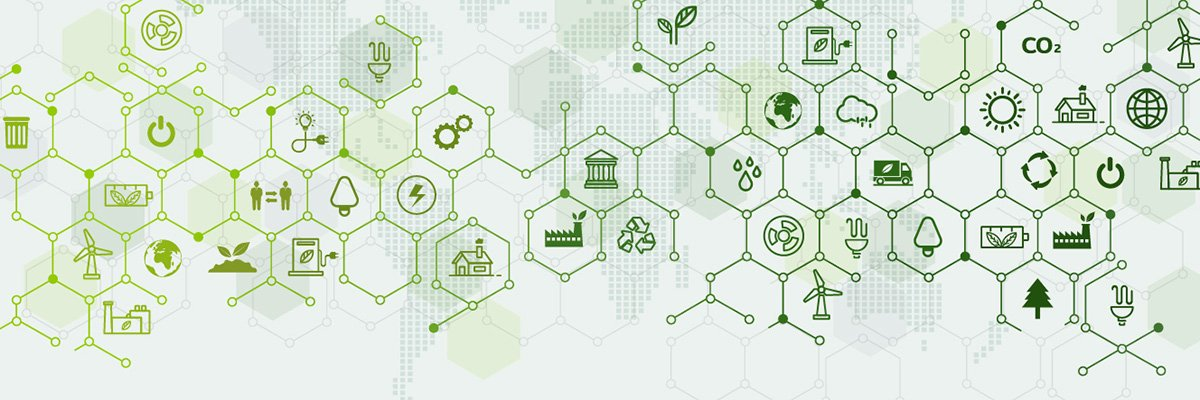
## Stage 2: Data exploration and visualization

***

### Notebook Contents:
0. Introduction
1. Notebook setup - libraries and data import, notes on the data source
2. Global data overview
3. Feature/column abbreviations and units
4. Definition of the hypothesis to be tested
5. Feature engineering
    - features overview
    - derivation of additional important features
    - removal of unnecessary features
6. Prepare the visualization
7. Create plots
    - a global look onto all relationships and detailed plots of chosen dependencies
    - correlation matrix heatmaps
    - scatterplots, histograms
    - detection of outliers
    - discussion of dependencies and trends
8. Conclusions

***

### 1. Import libraries and dataset :

In [3]:
# import all needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import the cleaned dataset from a csv file
data = pd.read_csv(r'data_cleaned.csv')

### 2. Global overview of the available data

A global overview of the imported data yields the following insights:

In [4]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [5]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


,0
country,object
year,int64
cereal_yield,float64
fdi_perc_gdp,float64
en_per_gdp,float64
en_per_cap,float64
co2_ttl,float64
co2_per_cap,float64
co2_per_gdp,float64
pop_urb_aggl_perc,float64


In [6]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


In [7]:
print("Descriptive statistics:")
data.describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
year,1700.0,1.999571e+03,5.143070e+00,1.991000e+03,1.995000e+03,2.000000e+03,2.004000e+03,2.008000e+03
cereal_yield,1700.0,3.013318e+03,1.796206e+03,1.757000e+02,1.683365e+03,2.584800e+03,3.933400e+03,8.410800e+03
fdi_perc_gdp,1700.0,2.948940e+00,3.949722e+00,-1.502768e+01,8.341052e-01,1.993220e+00,3.702149e+00,5.137395e+01
en_per_gdp,1700.0,2.498227e+02,1.861950e+02,6.633537e+01,1.363205e+02,1.976249e+02,2.864749e+02,1.383380e+03
en_per_cap,1700.0,1.968980e+03,1.959420e+03,1.165115e+02,5.428828e+02,1.089226e+03,2.893996e+03,1.260784e+04
co2_ttl,1700.0,9.793999e+05,3.235692e+06,7.077310e+02,1.462125e+04,7.728386e+04,3.708446e+05,3.064936e+07
co2_per_cap,1700.0,4.676663e+00,4.906273e+00,2.941071e-02,9.227695e-01,3.093346e+00,7.441195e+00,3.710650e+01
co2_per_gdp,1700.0,4.823038e+02,3.921922e+02,4.555259e+01,2.571396e+02,3.684156e+02,5.869730e+02,3.343454e+03
pop_urb_aggl_perc,1700.0,2.148013e+01,1.210516e+01,3.526316e+00,1.238395e+01,1.852596e+01,2.898832e+01,6.050578e+01
prot_area_perc,1700.0,1.220179e+01,9.116682e+00,0.000000e+00,5.839844e+00,1.029379e+01,1.659930e+01,5.374983e+01


### 3. Used feature/column abbreviations

The features/columns were given in Stage 1 clearer abbreviations in order to ensure easies understanding, representation and coding. These are listed in the following table together with the corresponding units:

<table>
    <tr>
        <td> <b> Variable name </b> </td>
        <td> <b> Description </b> </td>
        <td> <b> Unit </b> </td>
    </tr>
    <tr>
        <td> cereal_yield </td>
        <td> Cereal yield </td>
        <td> kg per hectare </td>
    </tr>
    <tr>
        <td> fdi_perc_gdp </td>
        <td> Foreign direct investment, net inflows </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> en_per_gdp </td>
        <td> Energy use per units of GDP </td>
        <td> kg oil eq./\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> en_per_cap </td>
        <td> Energy use per capita </td>
        <td> kilograms of oil equivalent </td>
    </tr>
    <tr>
        <td> co2_ttl </td>
        <td> CO2 emissions, total </td>
        <td> KtCO2 </td>
    </tr>
    <tr>
        <td> co2_per_cap </td>
        <td> CO2 emissions per capita </td>
        <td> metric tons </td>
    </tr>
    <tr>
        <td> co2_per_gdp </td>
        <td> CO2 emissions per units of GDP </td>
        <td> kg/\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> pop_urb_aggl_perc </td>
        <td> Population in urban agglomerations >1million </td>
        <td> % </td>
    </tr>
    <tr>
        <td> prot_area_perc </td>
        <td> Nationally terrestrial protected areas </td>
        <td> % of total land area </td>
    </tr>
    <tr>
        <td> gdp </td>
        <td> Gross Domestic Product (GDP) </td>
        <td> \$ </td>
    </tr>
    <tr>
        <td> gni_per_cap </td>
        <td> GNI per capita </td>
        <td> Atlas \$ </td>
    </tr>
    <tr>
        <td> under_5_mort_rate </td>
        <td> Under-five mortality rate </td>
        <td> per 1,000 </td>
    </tr>
    <tr>
        <td> pop_growth_perc </td>
        <td> Population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> pop </td>
        <td> Population </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> urb_pop_growth_perc </td>
        <td> Urban population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> urb_pop </td>
        <td> Urban population </td>
        <td> 1 </td>
    </tr>
    
</table>

#### 🌍 Global Average CO₂ Emissions per Capita Over Time – Chart Explanation

This line chart shows the **global average CO₂ emissions per capita** (in metric tons) from **1991 to 2008**.

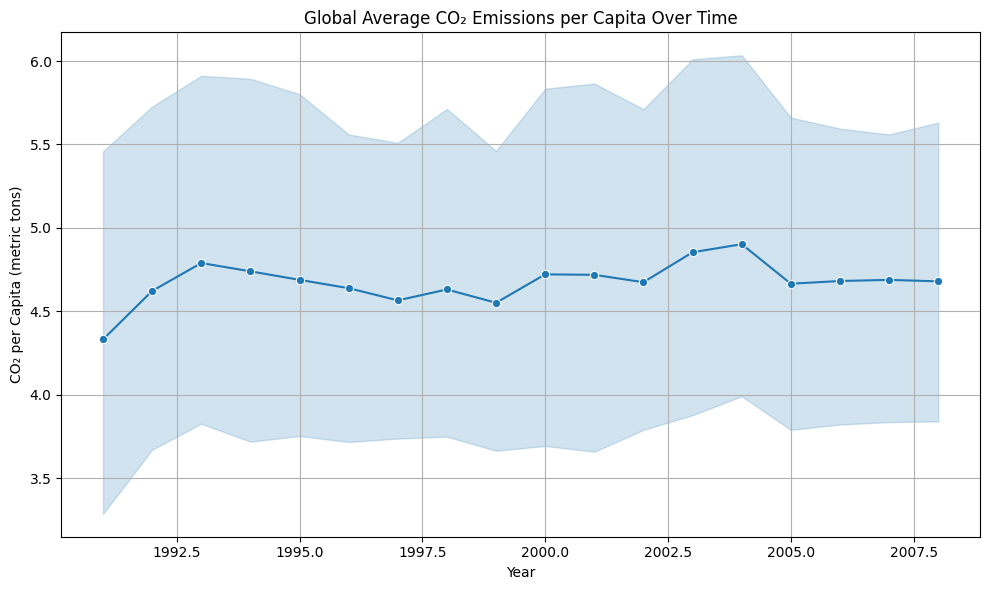

In [8]:
# Group by Year and calculate mean CO₂ per capita
df_yearly_avg = data.groupby('year')['co2_per_cap'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='co2_per_cap', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

📈 **Key Components**

- **Blue Line with Markers**:  
  Represents the **mean CO₂ emissions per capita** globally for each year.

- **Shaded Blue Area (Confidence Band)**:  
  Indicates the **variation or uncertainty** (e.g., standard deviation or confidence interval) around the average.  
  A wider band means greater variability among countries in that year.

---

> 🧠 **Insights from the Chart**

1. **Overall Stability with Minor Fluctuations**  
   The global average remains relatively stable over time, ranging between **4.3 and 4.9 metric tons per capita**.

2. **Slight Increase (Early 1990s to Mid-1990s)**  
   From ~4.3 in 1991 to ~4.8 in 1994, showing modest global emission growth—possibly due to economic expansion post-Cold War.

3. **Plateau & Minor Dips (Late 1990s to 2008)**  
   Emission levels hover around 4.6–4.8 with minor year-to-year changes, indicating no strong global trend up or down during this period.

4. **High Country-Level Variability**  
   The **broad shaded area** suggests significant disparities in per capita CO₂ emissions across countries—developing vs. developed economies.

Despite some fluctuations, **global per capita CO₂ emissions remained largely steady** between 1991 and 2008, averaging ~4.6 metric tons.
However, the **wide range of values among countries** reveals that this average masks stark differences in national emissions profiles.
Some countries likely increased emissions while others improved or stabilized, balancing out the global trend.

---


#### 🌐 Total CO₂ Emissions vs Population – Chart

This scatter plot illustrates the relationship between a country's **total CO₂ emissions** and its **population**.


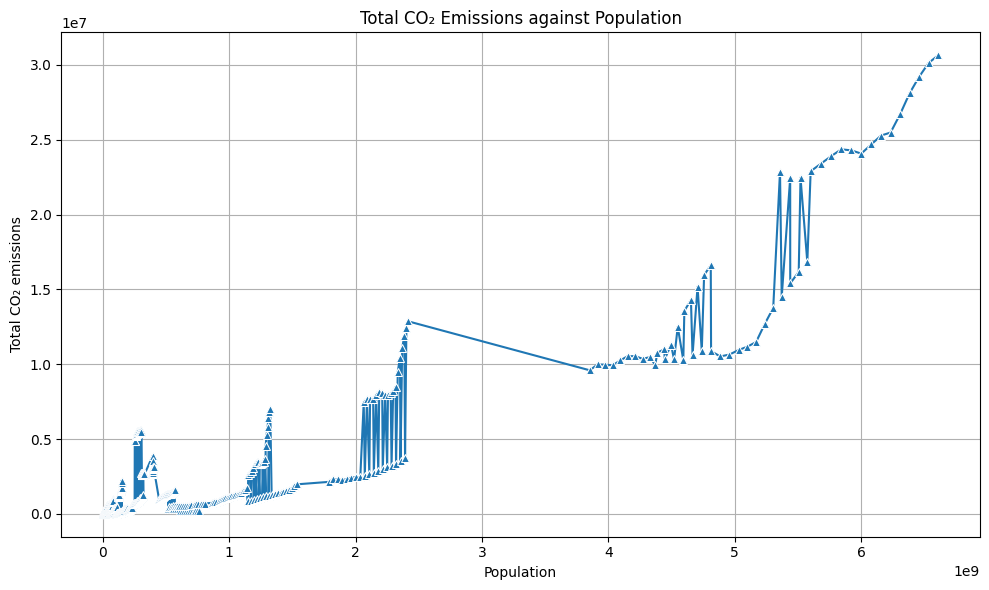

In [9]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='pop', y='co2_ttl', marker='^')
plt.title('Total CO₂ Emissions against Population')
plt.ylabel('Total CO₂ emissions')
plt.xlabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations** 🔍

1. **Positive Correlation**  
   There's a clear trend that **countries with larger populations tend to have higher total CO₂ emissions**.

2. **Steep Jumps at Key Population Ranges**  
   Noticeable vertical bands around:
   - ~1–1.5 billion (likely China)
   - ~1–1.4 billion (likely India)
   - ~300–400 million (e.g., USA)
   These could represent individual countries contributing large emissions due to both high population and industrial activity.

3. **High Variability at Similar Populations**  
   Some vertical streaks show countries with **similar populations but vastly different CO₂ emissions**, likely due to:
   - Differences in industrialization
   - Energy sources (renewable vs fossil fuels)
   - Economic structure and development

4. **Discontinuities or Gaps**  
   The sudden drops between points might indicate:
   - Missing data for some countries
   - Uneven time steps
   - Jumps between countries with very different sizes or emission levels


The chart strongly suggests that **population size is a significant driver of total CO₂ emissions**. However, **emissions per person can vary widely**, as countries with similar populations show vastly different total CO₂ outputs. This highlights the importance of not just population, but also energy policy, industrialization, and carbon efficiency when analyzing emissions data.

### 4. Hypothesis Definition

The dataset includes various country-level features categorized as:

- 🌍 **Emissions**: CO₂, CH₄, N₂O, etc.  
- 👥 **Population metrics**: total population, urban %, growth  
- 💰 **Economic indicators**: GDP, GNI, FDI  
- 🌾 **Land use**: cereal yield, agricultural land, protected areas  
- 🌦️ **Climate data**: precipitation, natural disasters  
- ⚡ **Energy use**  
- 🏥 **Health metrics**: medical personnel count  
- ...and others

---

#### 🎯 Project Goal

To explore how factors like economy, energy use, and land use influence emissions and climate indicators. Ultimately, develop a **predictive ML model** for emissions or climate data using the above features.

---

#### 📌 Hypothesis

> **CO₂ emissions are influenced by country-specific features** such as energy use, population metrics, GDP, FDI, and land use — and can be predicted from them.

In this study, **CO₂ emissions** will be treated as the **dependent variable**, and we’ll assess how it relates to other available features.

---

_Note: Some features were excluded due to high missingness during preprocessing._


***
### 5. Feature engineering

The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

   - per capita: *co2_per_cap* and *en_per_cap*
   - per unit of GDP: *co2_per_gdp* and *en_per_gdp*
   - total values: *co2_ttl*

Since the energy use is not available as a total value, an additional column will be derived by multiplying the value referred to a unit of GDP *'en-er_gdp'* with the column *'gdp'* and dividing by 1000 (The energy use per unit of GDP is defined in the dataset documentation as the energy use in kilograms of oil equivalent per  \\$1000 of GDP [kg oil eq./\\$1,000]).

Create a column for the total energy use:

In [10]:
# create a column for the total energy use
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000

### Choosing the Best Unit for CO₂ Emissions & Energy Use

To determine the most meaningful unit for **CO₂ emissions** and **energy use**, we analyze their **correlations** with other variables.

🔍 **Goal**: Identify the units (e.g., per capita, total, per GDP) that show the **strongest and broadest correlations** with other country-level features.

This is achieved by examining the **correlation matrix** of all variables.


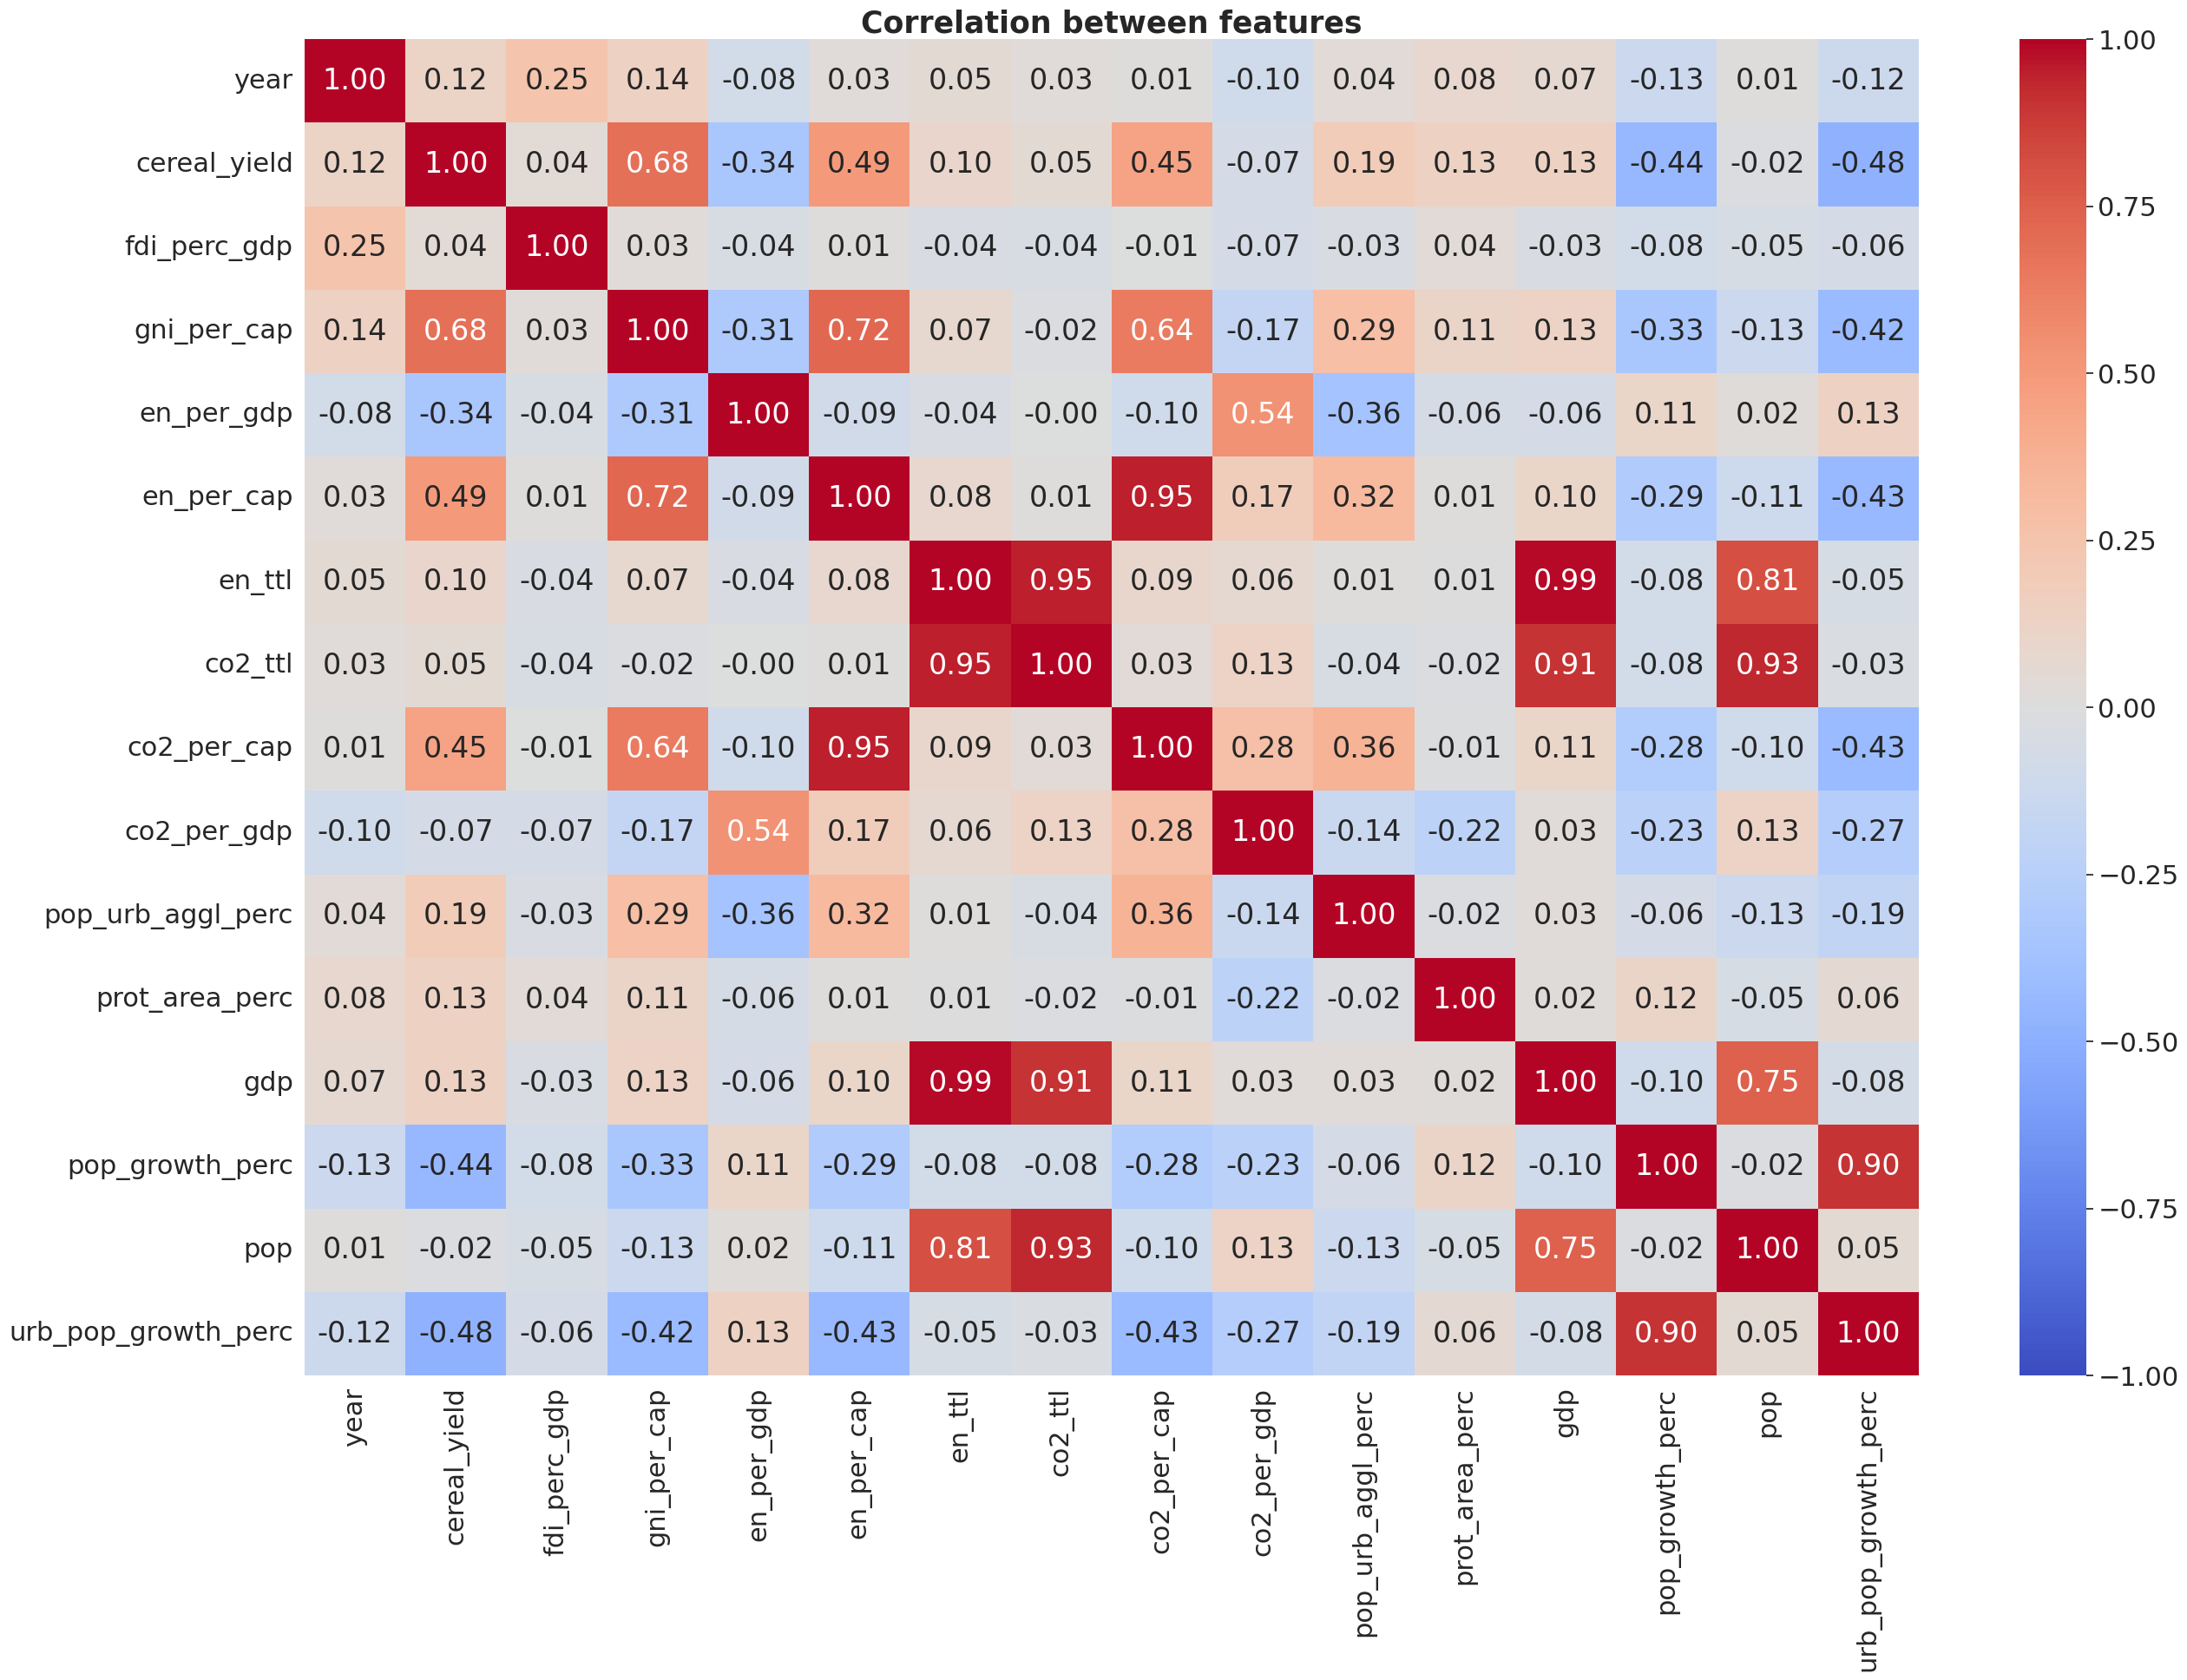

In [11]:
# select all features
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features
# correlation matrix
sns.set_theme(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt = ".2f",
            center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set_theme(font_scale=1)


- When comparing the dependencies of co2_ttl, co2_per_cap, and co2_per_gdp with other features, **co2_per_cap** shows stronger correlations with more variables.

- It also reflects CO₂ emissions independent of population size, making it more useful for comparing countries of different sizes and populations.

- Since most chosen variables are already linked to population, including pop (population count) adds little value — this is also supported by its low correlation.

Based on this, the following features will be excluded from further analysis due to weak correlations: pop = -0.1, en_per_gdp = -0.1, en_ttl = 0.09, co2_per_gdp, and co2_ttl = 0.03.

In [12]:
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]


vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns # Use the columns from the features_for_vif DataFrame
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])] # Use the values and number of columns from features_for_vif
print(vif_data)

               feature        VIF
0         cereal_yield   1.528133
1         fdi_perc_gdp   0.971334
2          gni_per_cap   2.910812
3           en_per_cap  12.579371
4          co2_per_cap  10.762323
5    pop_urb_aggl_perc   0.979676
6       prot_area_perc   1.022400
7                  gdp   1.106440
8      pop_growth_perc   6.336530
9  urb_pop_growth_perc   5.808288


VIF values measure how much a feature's variance is inflated due to multicollinearity with other features:

- VIF < 5 → Low multicollinearity (generally safe)

- VIF 5–10 → Moderate multicollinearity (potential issue)

- VIF > 10 → High multicollinearity (problematic, should consider dropping or combining)

In [13]:
features = features_all[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

***

## 6. Prepare the visualizations

### Plotting preparation

#### Ensure easier labeling of the plots
In order to make the labeling of the variables within plots easier in the code, a dictionary with the column names and variable labels to use on axes is defined:

In [14]:
# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

#### Choose a subset of countries to plot
The big amount of data points will result in slower processing of the plot and in a less clear representation. This can be avoided by choosing roughly half of the countries just for the paired scatter plot:

In [15]:
# get unique values in country column

unique_countries = data['country'].unique()
unique_countries

array(['AGO', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'BGD', 'BGR', 'BLR',
       'BOL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECA', 'ECU',
       'EGY', 'EMU', 'ESP', 'ETH', 'FIN', 'FRA', 'GBR', 'GHA', 'GRC',
       'GTM', 'HND', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISR', 'ITA',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KOR', 'LAC', 'LIC', 'LMC', 'LMY',
       'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS', 'NGA', 'NLD', 'NZL',
       'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROM', 'RUS',
       'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR', 'TGO',
       'THA', 'TUR', 'TZA', 'UKR', 'UMC', 'URY', 'USA', 'UZB', 'VEN',
       'VNM', 'WLD', 'YEM', 'ZAF', 'ZAR', 'ZMB'], dtype=object)

#### CO₂ Emissions per Capita Over Time (Selected Countries)

This line chart illustrates the **CO₂ emissions per capita** (in metric tons) over time for five selected countries: **India (IND), New Zealand (NZL), Pakistan (PAK), USA, and Russia (RUS)**, spanning from the early 1990s to 2008.


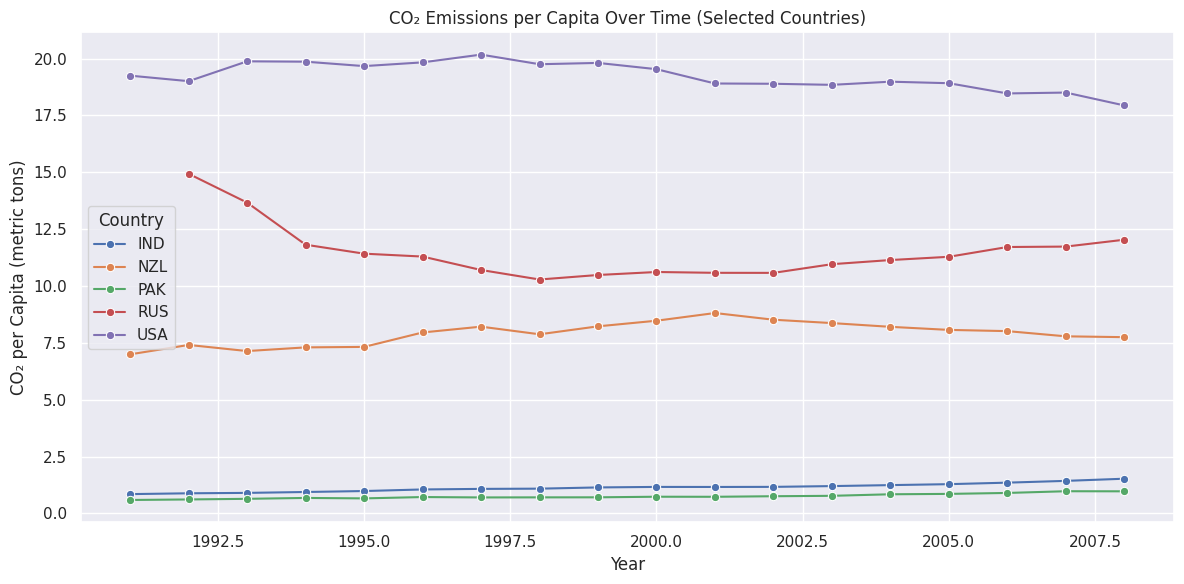

In [16]:
# Select countries to compare
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']

# Use the correct DataFrame variable 'data' and column names 'country', 'year', and 'co2_per_cap'
df_selected = data[data['country'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))
# Use the correct DataFrame variable 'df_selected' and column names 'year' and 'co2_per_cap' for plotting
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

Key Observations:
- **USA** consistently records the highest per capita emissions, hovering around **19–20 metric tons**, though it shows a slight decline toward the end.
- **Russia (RUS)** shows a significant **decline in the early 1990s**, likely due to economic restructuring, and then stabilizes around **11–12 metric tons**.
- **New Zealand (NZL)** maintains a mid-level range, peaking around **9 metric tons**, then gradually declining.
- **India (IND)** and **Pakistan (PAK)** have the **lowest emissions per capita**, though both show **gradual upward trends**, indicating growing emissions with development.

#### Insight:
This comparison highlights stark differences in per capita emissions across developed and developing nations, and underscores the increasing trend in emissions for emerging economies like India and Pakistan.


In [17]:
# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['IND', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features_all[features_all['country'].isin(chosen_countries)]

***

## 7. Create plots and visualizations

The visualization is organized in a way that global overview of the data and dependencies is presented first, followed by more and more detailed representations of the more relevant relationships.

### A global look onto all relationships

Scatter plots of all chosen variables and countries will give a first impression of possible trends:

In [18]:
sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

Output hidden; open in https://colab.research.google.com to view.

The most obvious linear dependency of co2_per_cap is with en_per_cap. Apparent hints for nonlinear relationships can be observed in the plots of *co2_per_cap* versus *gni*, *pop_urb_aggl_perc*, *pop_growth_perc*, *urb_pop_growth_perc*.




#### Notable Outliers: United Arab Emirates

Another significant observation is the cluster of orange outlier points with CO₂ emissions per capita ranging between **25 and 40 metric tons**, all attributed to the **United Arab Emirates (ARE)**. While there are other country-specific outliers, they do not substantially impact the overall trend.

To enhance clarity, **ARE data points were removed**, and the updated plots are presented below:


In [19]:
# choose features and label columns
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc', 'co2_per_cap']

# Keep as DataFrame for filtering
features_for_plot = data[feature_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# remove the ARE outliers from the DataFrame used for plotting
features_for_plot = features_for_plot[features_for_plot['country']!='ARE']

After removing the outliers of a single country, the trends have become even more visible.

The following plot shows the relationsip between 4 variables:

Text(115.34385937499995, 0.5, 'CO2 emissions per capita [t]')

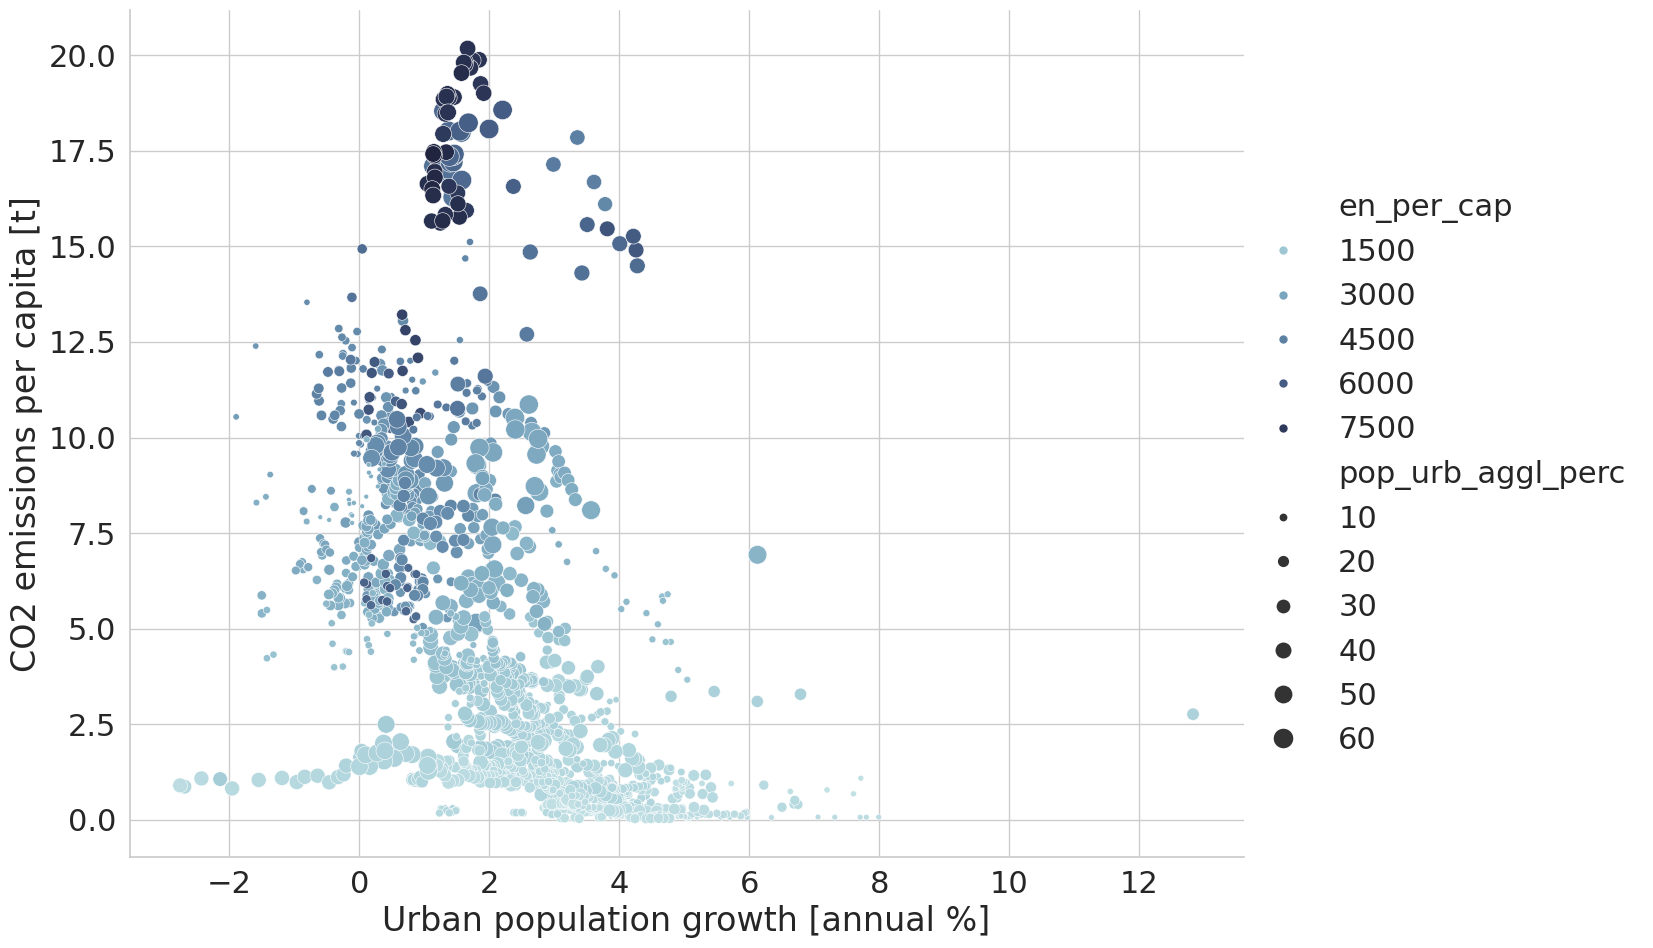

In [20]:
# 4d plot

sns.set_theme(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features_for_plot, # Use the DataFrame specifically prepared for plotting
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])

***

#### **Conclusions**

Targeted plotting of key relationships has provided useful insights for predictive analysis:

* CO₂ emissions and energy use per capita are linked to more features and will be kept for further analysis.

* Population count is no longer relevant and will be removed.

* CO₂ emissions per capita show a strong linear relationship with energy use and nonlinear patterns with other variables.

* Both country-specific and overall global trends are visible. In some cases, global trends split into different paths for clusters of countries.

* Outlier groups, especially those from the United Arab Emirates (ARE), stand out from global patterns and should be considered when selecting data.

* The nonlinear nature of most relationships and the presence of country-based clusters suggest using machine learning models that handle nonlinearities and grouped data well (e.g., Random Forest), rather than those suited for purely linear patterns (e.g., Linear Regression).

***